
## PRODUCCIÓN DE AZUCAR EN COLOMBIA EN 1995-2016
### Series de tiempo univariadas

La información relativa a la producción de algunos bienes del sector industrial en Colombia desde el año 1995 hasta la fecha, los datos son proporcionados por el banco de la república en mediciones mensuales a través de la variable de producción real a nivel nacional, incluyendo algunos bienes como Azucar, cemento gris, Lingotes de acero y producción de carbón. Para hacer un análisis de serie de tiempo, se usa la serie perteneciente a la **producción de azucar en Colombia** el cual es medido en toneladas por mes.

Con el objetivo de destablecer una secuencia de pasos para el analisis de la serie de tiempo, Se hace necesario el uso de **Spyder** y **Jupyter** como herramienta computacional. Para dar un inicio al proceso de análisis de la serie, se presentan las primeras 10 observaciones.

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

from datetime import datetime
import statsmodels as sm
import statsmodels.api as smapi
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


datap=pd.ExcelFile('C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\series de tiempo\\codigos\\industriadsd1995.xls')
print(datap.sheet_names)
tablap=datap.parse('Hoja1')
tablap.head(10)

#convirtiendo en objeto de serie de tiempo
date_rng = pd.date_range(start='1995/02/01', end='2016/04/01', freq='M')
serie_azucar =pd.Series(tablap['Azucar'].values,index=date_rng)
tablap.head(10)

['Hoja1', 'Hoja2', 'Hoja3']


,mes,Azucar,Cementogris,Lingotesacero,Prodcarbon
0,Feb,186151,698205,20129.0,893.0
1,Mar,188408,835836,21504.0,1173.0
2,Abr,123473,704222,22086.0,1036.0
3,May,170266,780111,23773.0,1164.0
4,Jun,168927,756874,25695.0,1084.0
5,Jul,182420,779769,25900.0,1154.0
6,Ago,199119,789706,24000.0,1092.0
7,Sep,189389,796606,27670.0,1019.0
8,Oct,163727,782026,28237.0,1202.0
9,Nov,158211,757963,25869.0,1327.0


In [5]:
serie_azucar

1995-02-28    186151
1995-03-31    188408
1995-04-30    123473
1995-05-31    170266
1995-06-30    168927
               ...  
2015-11-30    155685
2015-12-31    176042
2016-01-31    168781
2016-02-29    181305
2016-03-31    178359
Freq: M, Length: 254, dtype: int64

Teniendo en cuenta que la información de la producción de azucar, se identifica que hace parte de mediciones mensuales desde febrero de 1995 hasta el 16 de marzo de 2016, la gráfica de dicha serie se observa a continuación:

Text(0.5, 1.0, 'Serie de producción de azucar 1995-2016')

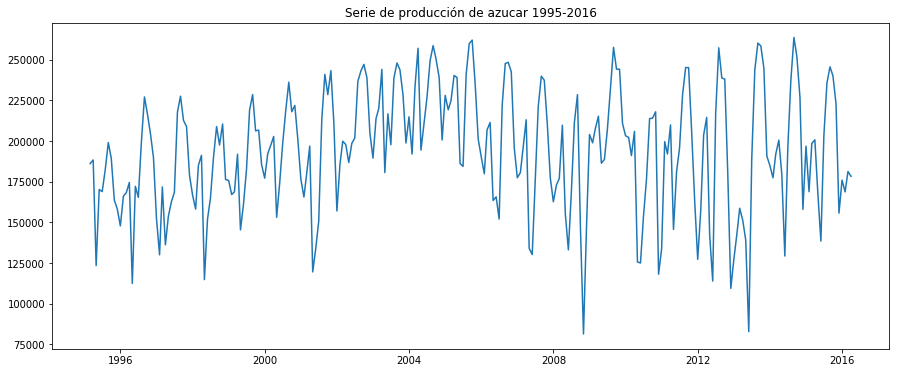

In [7]:
plt.plot(serie_azucar)
plt.title('Serie de producción de azucar 1995-2016')


El primer análisis que puede desarrollarse en la serie es netamente descriptivo, en este orden de ideas se puede obsrvar que la serie no tiene ningún patrón, la serie no tiene una media constante al transcurrir los años "la media no es la misma a lo largo del tiempo", asi  mismo se logra observar una tendencia en los primeros años la cual decrece aproximadamente en los últimos años, además se logra observar un aumento en la varianza. no obstante poría decisrse que la serie no es estacionaria y se debe hacer un procedimiento de trasformación para volverla a estacionaria. En el siguiente month plot se puede identificar el comportamiento no estacionario. 

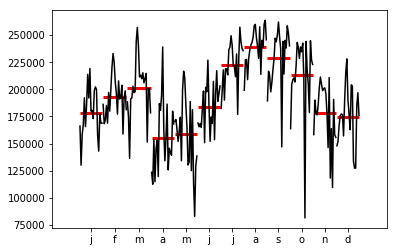

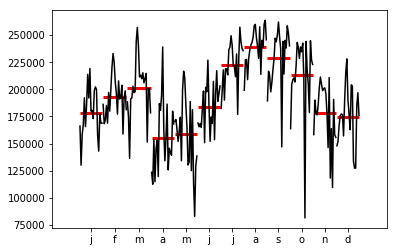

In [4]:
import statsmodels.api as smapi
smapi.graphics.tsa.month_plot(serie_azucar)

Para volver la serie a estacionaria se usará una descomposición basada en diferenciación.

### Estabilizar la varianza

En referencia a la serie de tiempo, a primera vista se logra observar que a traves del tiempo la varianza alcanza a aumentar un poco, dado lo anterior se ve la necesidad de buscar metodologias para identificar si existe la no estabilidad en la varianza, en este orden de ideas si fuese necesario se usara la transformacion **Box-Cox** el cual transforma los datos de la serie según un lambda específico el cual logre homogeneizar la varianza, dicha transformacion tiene la forma:

$$
f_x(U_t)=\left\{\begin{matrix}
 \lambda^-1 (U^{\lambda}_t - 1) & U_t\geq 0 & \lambda>0\\ 
Ln (U_t) & U_t >0 & \lambda=0
\end{matrix}\right.
$$

Este procedimiento puede ser usado rápidamente por medio del siguiente codigo, el cual identifica el valor específico $\lambda$



In [5]:
import scipy.stats
sp.stats.boxcox(serie_azucar,alpha=0.05)

(array([1.21889238e+08, 1.24219924e+08, 6.39370831e+07, 1.05945899e+08,
        1.04639395e+08, 1.18071771e+08, 1.35497587e+08, 1.25237950e+08,
        9.96217861e+07, 9.43979701e+07, 8.49099465e+07, 1.01969856e+08,
        1.04024783e+08, 1.10179267e+08, 5.52359702e+07, 1.07830554e+08,
        1.01258056e+08, 1.35920269e+08, 1.66675340e+08, 1.54822633e+08,
        1.41151236e+08, 1.25952676e+08, 8.88274013e+07, 6.93981861e+07,
        1.07493158e+08, 7.46454261e+07, 9.02402989e+07, 9.87033882e+07,
        1.04269692e+08, 1.56135868e+08, 1.67173770e+08, 1.50381460e+08,
        1.46079806e+08, 1.14606450e+08, 1.02577133e+08, 9.43773409e+07,
        1.20794028e+08, 1.27155532e+08, 5.70562607e+07, 8.85569733e+07,
        1.00785171e+08, 1.25971423e+08, 1.46147958e+08, 1.33895765e+08,
        1.47857718e+08, 1.12007982e+08, 1.11436703e+08, 1.02905936e+08,
        1.04534273e+08, 1.27887826e+08, 8.27053612e+07, 9.75108769e+07,
        1.18287499e+08, 1.57439579e+08, 1.68309944e+08, 1.432693

En correspondencia a la información anteriormente suministrada, se logra observar el valor de $\lambda=1.5716374$ y un intervalo de confianza para el valor entre $(1.033, 2.137)$ donde se encuentra $\lambda$. Con el fin de estabilizar la varianza se obtiene un lambda muy cercano a 1, sin embargo lo más aconsejable es realizar la transformacion a los datos:

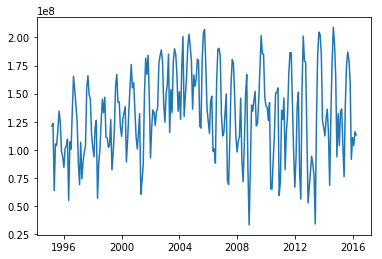

In [6]:
ts_azucar=sp.stats.boxcox(serie_azucar,lmbda=1.571)  #haciendo la transformación Box-cox
ts_azucar =pd.Series(ts_azucar,index=date_rng) 
plt.plot(ts_azucar)


En la anterior serie es generada después de realizarle la trasnformación Box-Cox sugerida, en ella se muestra el respectivo cambio de escala y además una mejoria visualmente con respecto a la estabilización de la varianza.

### Descomposición basada en diferenciación

Para el proceso estocastico deterimnado por la producción de azucar $\{  X_t \}$ no estacionario, existen diversas estrategias para convertirlo en un proceso $\{  Y_t \}$ estacionario, se propone desarrollar el método de descomposición basado en diferenciación el cual consiste en transformar los datos $\{  X_t \}$ eliminando las componentes $M_t$ y $S _t$, aquí llamaremos a $M_t$ el componente de tendencia, a $S_t$ la componente estacional, la filosofia consiste en transformar los datos de tal manera que se eliminen los componentes  y de esta manera convertir al proceso $\{  X_t \}$ que es no estacionario  en $Y_t$ el cual es estacionario.

En este orden de ideas, se propone una diferenciación ordinaria para la serie para quitar la tendencia:

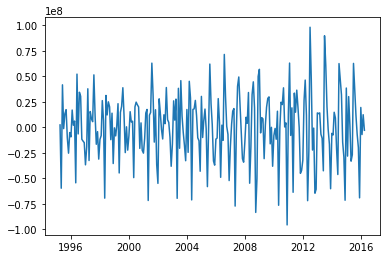

In [7]:
DFazucar=pd.DataFrame(ts_azucar)
diford=DFazucar.diff(periods=1) 
plt.plot(diford)   

#### Prueba Dickey Fuller
Es importante considerar la prueba de Dickey Fuller para la serie estabilizada en varianza para poder identificar la presencia o no de raiz unitaria en la serie, al observar el p-valor de la siguiente prueba se decide rechazar la hipotesis nula:

$H_o:$Hay presencia de raíz unitaria  v.s $H_1:$ No hay presencia de raíz unitaria 

Indicandose la presencia de una raiz unitaria junto con la necesidad de diferenciar estacionalmente la serie.

In [8]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts_azucar, regression='nc')
adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print (adfoutput)

Test Statistic                  -0.020276
p-value                          0.677494
#Lags Used                      16.000000
Number of Observations Used    237.000000
dtype: float64


Se procede a hacer la función de autocorrelación simple y parcial de la serie diferenciada

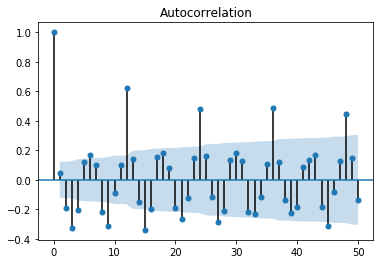

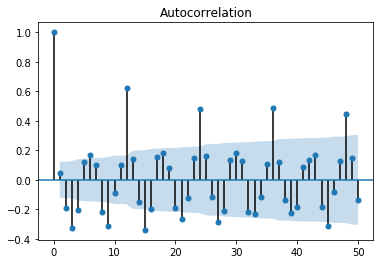

In [9]:
vecto=np.zeros((254,1))
x1=np.array(diford)

for i in range(1,254):
    vecto[i-1]=x1[i]

acf(vecto,nlags=50,unbiased=False)
plot_acf(vecto, lags=50, unbiased=False) 

Considerando al anterior acf y el siguiente monthplot se puede observar que todavía existe una **estacionalidad** en la serie, con lo cual se opta por generar la diferenciación estacional considerando 12 periodos anteriores (12 es el periodo de la componente estacional):

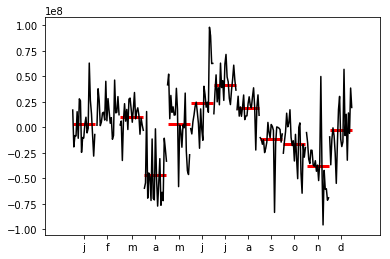

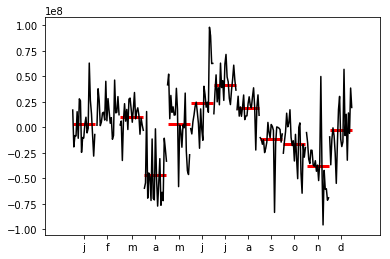

In [10]:
smapi.graphics.tsa.month_plot(diford)

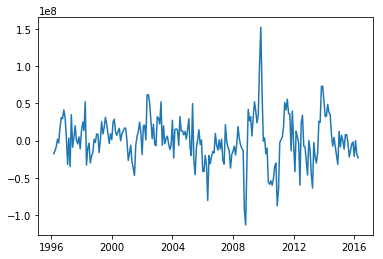

In [11]:
difest=DFazucar.diff(periods=12)    ###Diferencia Estacional
#print(difest)
plt.plot(difest)

La anterior gráfica muestra la serie estacionaria resulatnte $Y_t$ a la cual se le ha realizado el proceso de descomposición basado en diferenciación ordinaria y estacional. No obstante a continuación se muestra el gráfico month plot de la serie diferenciada estacionalmente indicandose que ya no hay más necesidad de diferenciar estacionalmente.

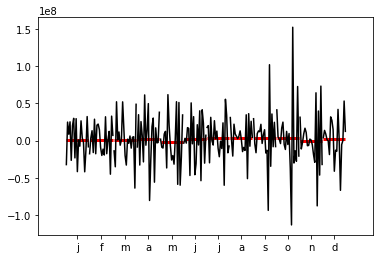

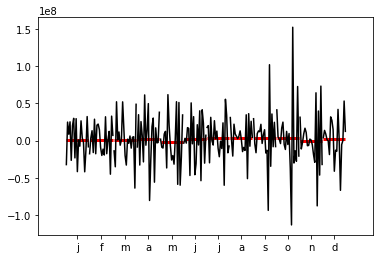

In [12]:
difest=difest[12:241]
smapi.graphics.tsa.month_plot(difest)

## Identificación del modelo

Acontinuación se presenta el procedimiento para la identificación de modelos basados en la funciones de autocorrelacion simple y parcial determinando los ordenes de promedios móviles y autorregresivio. Se presenta la función de autocorrelación simple para el proceso resultante:

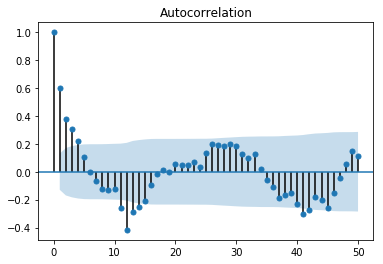

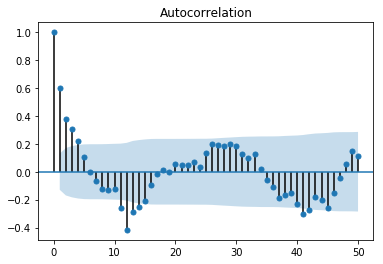

In [13]:
acf(difest,nlags=50,unbiased=False)
plot_acf(difest, lags=50, unbiased=False)   

Dado el proceso de descomposición basado en diferenciación generado anteriormente, el modelo resultante al ser estacionario puede ser estimado por medio de un ARMA(p,q). Al observar la acf y pacf se observa que los datos tienen componente autorregresivo y promedios móviles mixta, puesto que ninguna de las dos: funcion de autocorrelación simple y función de autocorrelación parcial no se van rápidamente para cero (rezagos altos de ellas son significativos).

Con respecto a la función de autocorrelación simple, presentadda en la grafica anterior se logra observar que los rezagos 1,2,3,4,10,11,12,13 y 14 salen de las bandas móviles esto significa que son significativamente diferentes de cero, no obstante el rezago 14 es el último lo cual implica que el proceso que generó los datos puede ser modelado por medio de un MA(14). Observemos la gráfica de la función de autocorrelación parcial.

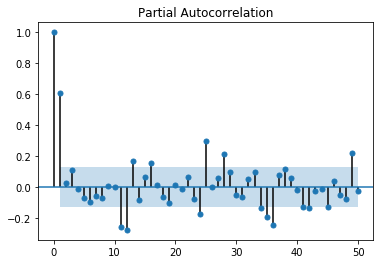

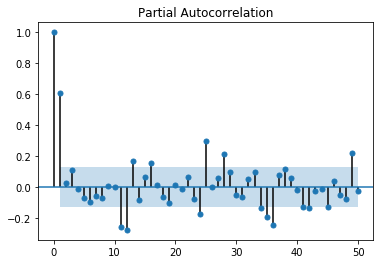

In [14]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf(difest,nlags=50)
plot_pacf(difest,lags=50) 

Siguiendo la metodología, en la anterior gráfica se observa que las autocorrelaciones parciales de rezago mayores a 13 son no significativas (excepto por algún rezago alto) y las anteriores significativas esto indica que los datos posiblemente provienen de un proceso AR(13). 

### Análisis del modelo según criterios de información

Para poner en marcha un análisis por medio de criterios de información y seleccionar un modelo que se ajuste a la serie minimizando dicho criterio se hará referencia al **BIC** y se considerarán los ordenes máximos para los componentes autorregresivos y promedios móviles son $p=13$ y $q=14$ respectivamente, se procede a ajustar un modelo para cada componente, primero con el MA(14).

##### MA(14)

In [15]:
from statsmodels.tsa.arima_model import ARIMA
#ajuste.summary()
modeloMA14 = smapi.tsa.statespace.SARIMAX(difest, trend='n', order=(0,0,14))  
resultsmodeloMA14 = modeloMA14.fit() 
print(resultsmodeloMA14.summary())
resultsmodeloMA14.bic

                           Statespace Model Results                           
Dep. Variable:                      0   No. Observations:                  229
Model:              SARIMAX(0, 0, 14)   Log Likelihood               -4198.261
Date:                Tue, 09 Jul 2019   AIC                           8426.521
Time:                        21:10:08   BIC                           8478.027
Sample:                    02-29-1996   HQIC                          8447.300
                         - 02-28-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5602      0.081      6.924      0.000       0.402       0.719
ma.L2          0.3206      0.107      2.993      0.003       0.111       0.530
ma.L3          0.1860      0.118      1.576      0.1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


8478.027289277066

Observando el p-valor en cada uno de las estimaciones de los parámetros se logra observar su significancia, en resumen $\theta_{14}$ , $\theta_{11}$ ,$\theta_{10}$ ,$\theta_{9}$ ,$\theta_{8}$ , $\theta_{7}$  , $\theta_{5}$,$\theta_{4}$,$\theta_{3}$   no son significativos. Realizando las estimaciones en cada combinacion de parámetros e identificando el mínimo BIC generado, se logra encontrar un modelo MA(13), considerando los parámetros $\theta_{1}$ , $\theta_{2}$ ,$\theta_{6}$  , $\theta_{12}$ ,$\theta_{13}$ significativos, ver la siguiente salida:

In [16]:
ma_orden=[1,1,0,0,0,0,0,0,0,0,0,1,1,0] 
modeloMA = smapi.tsa.statespace.SARIMAX(difest, trend='n', order=(0,0,ma_orden))
resultsMA = modeloMA.fit()
print(resultsMA.summary())
resultsMA.bic

                                 Statespace Model Results                                
Dep. Variable:                                 0   No. Observations:                  229
Model:             SARIMAX(0, 0, (1, 2, 12, 13))   Log Likelihood               -4212.722
Date:                           Tue, 09 Jul 2019   AIC                           8435.445
Time:                                   21:10:09   BIC                           8452.613
Sample:                               02-29-1996   HQIC                          8442.371
                                    - 02-28-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5804      0.079      7.371      0.000       0.426       0.735
ma.L2          0.1828      0.084      2.186

8452.613234102564


#### AR(13)
observemos la estimación de los parámetros y la significancia para un autorregresivo de orden 13:

Identificando el p-valor en cada uno de las estimaciones de los parámetros se logra observar su significancia, en resumen $\phi_{1},\phi_{12},\phi_{13}$son significativos, todo esto al realizar las estimaciones en cada combinación de parámetros e identificando el mínimo BIC generado, se logra encontrar un modelo AR(13) ver la siguiente salida:

In [17]:
ar_orden=[1,0,0,0,0,0,0,0,0,0,0,1,1] #especifica los parametros requeridos
modeloAR = smapi.tsa.statespace.SARIMAX(difest, trend='n', order=(ar_orden,0,0))  
####Si tiene parte estacional agregar seasonal_order=(0,0,0,12)###
resultsAR = modeloAR.fit()
print(resultsAR.summary())
resultsAR.bic

                               Statespace Model Results                               
Dep. Variable:                              0   No. Observations:                  229
Model:             SARIMAX((1, 12, 13), 0, 0)   Log Likelihood               -4212.757
Date:                        Tue, 09 Jul 2019   AIC                           8433.513
Time:                                21:10:09   BIC                           8447.248
Sample:                            02-29-1996   HQIC                          8439.054
                                 - 02-28-2015                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5766      0.042     13.722      0.000       0.494       0.659
ar.L12        -0.3686      0.052     -7.085      0.000      -0.471 

8447.248021659743

Al realizar el procedimiento de quitar y ver significancia en modelos, se identifica que el mejor modelo bajo el criterio de información BIC para el componente autorregresivo es AR(13) con parámetros significativos $\phi_{1}$ , $\phi_{12}$ ,$\phi_{13}$, el cual tiene un BIC=8447. No obstante para el componente de promedios móviles se tiene un MA(14) con parámetros significativos $\theta_{1}$ , $\theta_{2}$ , $\theta_{12}$ ,$\theta_{13}$ y BIC=8452. Ahora bien, se presenta el modelo SARIMA(11,1,1)*(1,1,3,12) junto con la estimación de sus parámetros.

#### ARIMA

Considerando los ordenes p=13, q=14, se genera el modelo que genera el menor BIC y a su vez tiene sus parámetros significativos, ver la siguiente salida:

In [18]:
ar_orden=[1,0,0,0,0,0,0,0,0,0,0,1,0] 
ma_orden=[1,0,0,0,0,0,0,0,0,0,0,0,0]
modeloARIMA = smapi.tsa.statespace.SARIMAX(ts_azucar, trend='n', order=(ar_orden,1,ma_orden),enforce_invertibility=False)  
resultsARIMA = modeloARIMA.fit()
print(resultsARIMA.summary())
resultsARIMA.bic

                               Statespace Model Results                              
Dep. Variable:                             y   No. Observations:                  254
Model:             SARIMAX((1, 12), 1, (1,))   Log Likelihood               -4666.678
Date:                       Tue, 09 Jul 2019   AIC                           9341.355
Time:                               21:10:09   BIC                           9355.489
Sample:                           02-28-1995   HQIC                          9347.042
                                - 03-31-2016                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1926      0.055      3.509      0.000       0.085       0.300
ar.L12         0.6200      0.036     17.249      0.000       0.550       0.

9355.488973511878

Con un BIC=9355 se genera el mejor modelo ARIMA cuyos parámetros  $\phi_{1}$,  $\phi_{12}$,  $\theta_{1}$

#### SARIMA(11,1,11)*(1,1,3,12)

Por medio de FAC y PACF se puede identificar los ordenes p=11, q=11, P=1, Q=3 junto con los parámetros significativos del modelo, se genera el siguiente modelos SARIMA el cual establece sus parámetros y la significancia de estos:

In [35]:
import statsmodels.api as smapi
modeloSARIMA = smapi.tsa.statespace.SARIMAX(ts_azucar, trend='n', order=(11,1,11),seasonal_order=(0,1,[1,0,0],12),enforce_invertibility=False)  
####Si tiene parte estacional agregar seasonal_order=(0,0,0,12)###
resultsSARIMA = modeloSARIMA.fit()
print(resultsSARIMA.summary())
resultsSARIMA.bic

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                  Statespace Model Results                                  
Dep. Variable:                                    y   No. Observations:                  254
Model:             SARIMAX(11, 1, 11)x(0, 1, 3, 12)   Log Likelihood               -4407.574
Date:                              Tue, 09 Jul 2019   AIC                           8863.147
Time:                                      21:13:19   BIC                           8946.783
Sample:                                  02-28-1995   HQIC                          8896.842
                                       - 03-31-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0497      3.661     -0.014      0.989      -7.226       7.126
ar.L2         -0.16

8946.782511382606

Al observarse la significancia del modelo, se puede observar que pocos parámetros son significativos son significativos el SMA12, sin embargo quitando y colocando los parámetros no significativos se llega al siquiente modelo el cual tiene menor BIC:

In [36]:
ar_orden=[1,0,0,0,0,0,0,0,0,0,0] 
ma_orden=[1,0,0,0,0,0,0,0,0,0,0] 
modeloSARIMA = smapi.tsa.statespace.SARIMAX(ts_azucar, trend='n', order=(ar_orden,1,ma_orden),seasonal_order=(0,1,[1,0,0],12),enforce_invertibility=False)  
results= modeloSARIMA.fit()
print(results.summary())
results.bic

                                       Statespace Model Results                                      
Dep. Variable:                                             y   No. Observations:                  254
Model:             SARIMAX((1,), 1, (1,))x((), 1, (12,), 12)   Log Likelihood               -4423.412
Date:                                       Tue, 09 Jul 2019   AIC                           8854.824
Time:                                               21:13:24   BIC                           8868.763
Sample:                                           02-28-1995   HQIC                          8860.439
                                                - 03-31-2016                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5830     

8868.762703326283

En el anterior ajuste del modelo SARIMA(11,1,11)*(1,1,3,12) puede observese la significancia de sus parámetros. Pero casi todos sus parámetros no fueron significativos, en especial los rezagos mas altos para la componente autorregresiva, promedios móviles y promedios móviles estacionales dejaron de ser explicados en el modelo. Haciendo un constraste con los BIC en el modelo,No obstante se realiza el modelo automático que genera el modelo por defecto identificandose:

In [37]:
ajuste=pm.auto_arima(difest,trend='n',start_p=1, d=0, start_q=1, max_p=11, max_q=11, start_P=0, D=0, start_Q=0, max_P=1, max_Q=3)
ajuste.summary()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 1) seasonal_order=(0, 0, 0, 1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  229
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -4229.880
Date:                Tue, 09 Jul 2019   AIC                           8463.761
Time:                        21:13:24   BIC                           8470.628
Sample:                             0   HQIC                          8466.531
                                - 229                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6011      0.038     15.803      0.000       0.527       0.676
sigma2      6.483e+14   7.09e-18   9.14e+31      0.000    6.48e+14    6.48e+14
===================================================================================
Ljung-Box (Q):                       80.26   Jarque-Bera (JB):                15.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.32   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

Dado el mdoelo anterior, solo los componentes autorregresivos y promedios moviles de orden 1 son los mejor modelan la serie, no obstante nos encontramos frente a dos modelos, un ARIMA(1,1,1) y un SARIMA(1,1,1)*(1,1,3,12) cuyos BIC son 8470 y 8868 respetivamente, por consiguiente se procede a seleccionar el modelo SARIMA puesto que además de considerar el menor BIC junto con los parámetros sgnificativos tiene en cuenta la 

#### VERIFICACIÓN DE LOS SUPUESTOS DEL MODELO  ARIMA(12,1,13)

Para realizar un análisis de los modelos propuestos verificamos los supuestos haciendo uso de los residuales de ambos modelos en este caso ARIMA


                               Statespace Model Results                              
Dep. Variable:                             y   No. Observations:                  254
Model:             SARIMAX((1, 12), 1, (1,))   Log Likelihood               -4666.678
Date:                       Tue, 09 Jul 2019   AIC                           9341.355
Time:                               21:11:18   BIC                           9355.489
Sample:                           02-28-1995   HQIC                          9347.042
                                - 03-31-2016                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1926      0.055      3.509      0.000       0.085       0.300
ar.L12         0.6200      0.036     17.249      0.000       0.550       0.

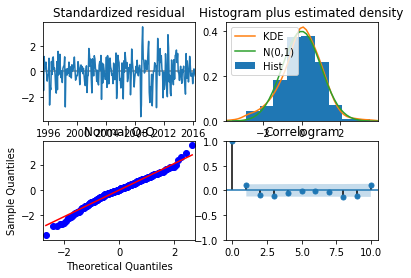

array([[[3.53655870e+00, 6.28686524e+00, 1.01589033e+01, 1.11354895e+01,
         1.11490382e+01, 1.11918366e+01, 1.14502320e+01, 1.60542041e+01,
         1.91525675e+01, 2.18462169e+01, 2.21695570e+01, 2.44307648e+01,
         2.47010259e+01, 2.79874223e+01, 3.44529046e+01, 3.48319574e+01,
         3.69693174e+01, 3.96061058e+01, 3.96711424e+01, 3.96839013e+01,
         4.05618197e+01, 4.13040563e+01, 4.28466978e+01, 4.32093223e+01,
         4.47617078e+01, 4.55438831e+01, 4.64658315e+01, 4.68439319e+01,
         4.90861280e+01, 5.17609429e+01, 5.20917996e+01, 5.38697565e+01,
         5.41833420e+01, 5.44704381e+01, 5.44742444e+01, 6.00514975e+01,
         6.08301913e+01, 6.17636658e+01, 6.18006169e+01, 6.41503065e+01],
        [6.00298865e-02, 4.31344791e-02, 1.72625885e-02, 2.50827665e-02,
         4.85037702e-02, 8.26253823e-02, 1.20150233e-01, 4.16108227e-02,
         2.39264489e-02, 1.59074852e-02, 2.30920794e-02, 1.77629711e-02,
         2.52612097e-02, 1.42827039e-02, 2.9401441

In [22]:
ar_orden=[1,0,0,0,0,0,0,0,0,0,0,1,0] 
ma_orden=[1,0,0,0,0,0,0,0,0,0,0,0,0]
modeloARIMA = smapi.tsa.statespace.SARIMAX(ts_azucar, trend='n', order=(ar_orden,1,ma_orden),enforce_invertibility=False)  
resultsARIMA = modeloARIMA.fit()
print(resultsARIMA.summary())
resultsARIMA.bic

residualesARIMA=resultsARIMA.resid  
resultsARIMA.plot_diagnostics()
plt.show()

resultsARIMA.test_serial_correlation(method='ljungbox')

* En los supuestos del modelo puede identificarse el qqplot los residuos están aproximadamente en la línea recta y la prueba Jarque Bera la cual no rechaza la hpótesis de normalidad.

* Se puede observar el pavlor de la estadística lijung-box que se cumple el supuesto de no autocorrelacion a un nivel de significancia del 5%

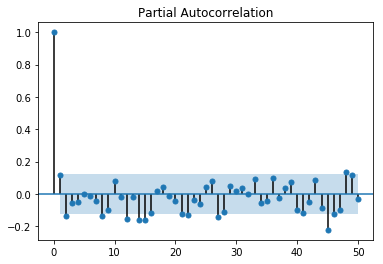

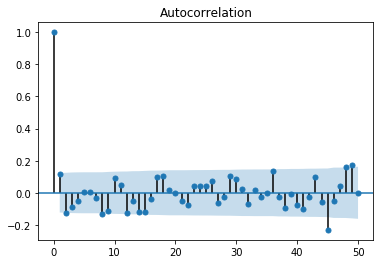

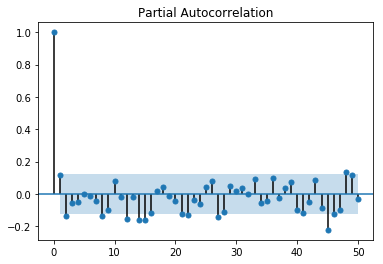

In [23]:
acf(residualesARIMA,nlags=50,unbiased=False)
pacf(residualesARIMA,nlags=50)

plot_acf(residualesARIMA,lags=50,unbiased=False)
plot_pacf(residualesARIMA,lags=50)


Un problema en el modelo ARIMA anterior son los residuales, los cuales en la gráfica PACF  y PACF se evidencia la falta de explicación en rezagos autorregresivos, asi como de promedios móviles del proceso. Luego se procede a realizar la estimación del modelo SARIMA:

#### VERIFICACIÓN DE LOS SUPUESTOS DEL MODELO  SARIMA(1,1,1)*(1,1,3,12)

Para realizar un análisis de los modelos propuestos verificamos los supuestos haciendo uso de los residuales de ambos modelos en este caso SARIMA


                                       Statespace Model Results                                      
Dep. Variable:                                             y   No. Observations:                  254
Model:             SARIMAX((1,), 1, (1,))x((), 1, (12,), 12)   Log Likelihood               -4423.412
Date:                                       Tue, 09 Jul 2019   AIC                           8854.824
Time:                                               21:11:24   BIC                           8868.763
Sample:                                           02-28-1995   HQIC                          8860.439
                                                - 03-31-2016                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5830     

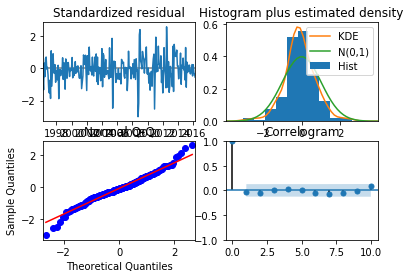

In [24]:

ar_orden=[1,0,0,0,0,0,0,0,0,0,0] 
ma_orden=[1,0,0,0,0,0,0,0,0,0,0] 
modeloSARIMA = smapi.tsa.statespace.SARIMAX(ts_azucar, trend='n', order=(ar_orden,1,ma_orden),seasonal_order=(0,1,[1,0,0],12),enforce_invertibility=False)  
results= modeloSARIMA.fit()
print(results.summary())
results.bic

residuales=results.resid   
results.plot_diagnostics()
plt.show()

In [25]:

results.test_serial_correlation(method='ljungbox')


array([[[ 0.42673518,  0.92727116,  0.98391906,  1.28176681,
          1.31718538,  2.30874771,  3.51477215,  4.09517166,
          4.16380573,  6.6308026 ,  7.41447604,  7.90091796,
          8.01354016,  8.14830547, 10.51005251, 10.68717234,
         12.84630075, 13.32427109, 15.30627908, 15.3702963 ,
         15.55801258, 15.77749968, 15.85621849, 19.72759627,
         20.33527083, 21.91406625, 22.80951497, 22.87921438,
         23.46555276, 25.24309979, 25.33042623, 25.90637794,
         27.57018925, 27.58069811, 27.65157273, 28.36552775,
         29.1505276 , 29.15924754, 32.02923445, 32.66928052],
        [ 0.51359531,  0.62899273,  0.80514299,  0.86446138,
          0.93315342,  0.88922786,  0.83365837,  0.84843622,
          0.90030403,  0.75977891,  0.76459419,  0.79282459,
          0.84271704,  0.88145731,  0.78649013,  0.82837052,
          0.74641291,  0.77196015,  0.70294234,  0.75484164,
          0.79394792,  0.82677299,  0.86135435,  0.71215699,
          0.72902467,  

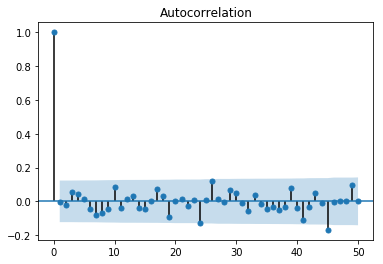

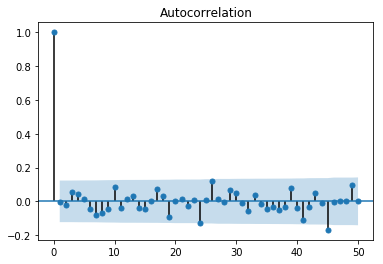

In [26]:
acf(residuales,nlags=50,unbiased=False)
plot_acf(residuales,lags=50,unbiased=False)

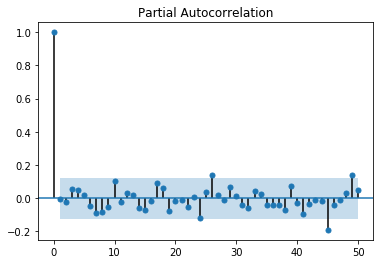

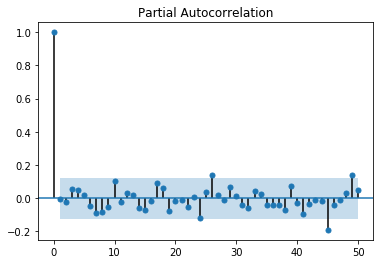

In [27]:
pacf(residuales,nlags=50)
plot_pacf(residuales,lags=50)

* En los supuestos del modelo puede identificarse el qqplot los residuos están aproximadamente en la línea recta exepto por valores extremos y la prueba Jarque Bera la cual no rechaza la hpótesis de normalidad. No obstante el supuesto de normalidad no es tan importante en series de tiempo.

* Se puede observar el pavlor de la estadística lijung-box que se cumple el supuesto de no autocorrelacion a un nivel de significancia del 5%

Observando los residuales del modelo, se puede observar que las funciones fac y pacf se comportan bien, lo que da indicios de un buen modelo a los datos a comparación del FAC Y PACF del modelo ARIMA. En este orden de ideas se toma el modelo SARIMA como el mejor modelo.

### Pronósticos

Identificandose el modelo de la serie de tiempo, el cual corrsponde a un ARIMA:

In [28]:
ar_orden=[1,0,0,0,0,0,0,0,0,0,0] 
ma_orden=[1,0,0,0,0,0,0,0,0,0,0] 
modeloSARIMA = smapi.tsa.statespace.SARIMAX(ts_azucar, trend='n', order=(ar_orden,1,ma_orden),seasonal_order=(0,1,[1,0,0],12),enforce_invertibility=False)  
resultsfinal= modeloSARIMA.fit()
print(resultsfinal.summary())

                                       Statespace Model Results                                      
Dep. Variable:                                             y   No. Observations:                  254
Model:             SARIMAX((1,), 1, (1,))x((), 1, (12,), 12)   Log Likelihood               -4423.412
Date:                                       Tue, 09 Jul 2019   AIC                           8854.824
Time:                                               21:11:30   BIC                           8868.763
Sample:                                           02-28-1995   HQIC                          8860.439
                                                - 03-31-2016                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5830     

Se procede a realizar los pronósticos del modelo, comenzando con la predicción un año después y de esta manera transformar los datos a la escala original, luego se proccede a graficar en la serie junto con su intervalo de predicción, 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


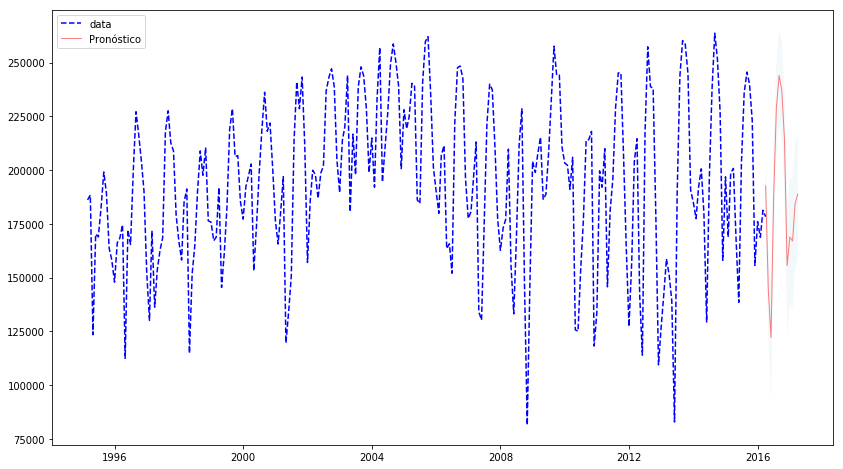

In [29]:
salforecast=resultsfinal.get_prediction(start='2016-03-31', end='2017-03-31',full_results=True,alpha=0.05,dynamic=False)  #estas dos se compilan al mismo tienmpo
forecast = salforecast.predicted_mean
ci = salforecast.conf_int(alpha=0.5)   #haciedo intervalo de confianza

arraypronosticosSTIC={'pronostico':forecast.values,'li':ci['lower y'].values,'ls':ci['upper y'].values}  #el valor del pronostico en la escala original que son
indice=pd.date_range(start='2016-03-31', end='2017-03-31',freq='M')
pronosticosSTIC=pd.DataFrame(data=arraypronosticosSTIC,index=indice)   #PRONOSTICOS E INTERVALOS DE CONFIANZA
 

def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

####Se devuelve  a la escala original
for column in ['pronostico', 'li', 'ls']:
    pronosticosSTIC[column] = inverse_boxcox(pronosticosSTIC[column],1.571) 


#######Gráfica de los pronósticos#####
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1,1,1)
#Actual data
serie_azucar=pd.DataFrame(serie_azucar) #convirtiendo a dataframe de pandas
ax.plot(serie_azucar.astype('float64'), '--', color="blue", label='data')   #colocando etiquetas
# Means
ax.plot(pronosticosSTIC['pronostico'], lw=1, color="red", alpha=0.5, label='Pronóstico') #colocando etiquetas
ax.fill_between(pronosticosSTIC['pronostico'].index, pronosticosSTIC.iloc[:, 1], pronosticosSTIC.iloc[:, 2], alpha=0.05)
ax.legend(loc='upper left')
plt.draw()

## MODELO ESTRUCTURAL

Se procede a estimar cada una de las componentes por medio de las siguientes líneas, no obstante ha de considerarse que la estadística z y el pvalor no tienen algun significado dentro del proceso:

                            Unobserved Components Results                            
Dep. Variable:                             y   No. Observations:                  254
Model:                    local linear trend   Log Likelihood               -4654.822
                   + damped stochastic cycle   AIC                           9321.645
Date:                       Tue, 09 Jul 2019   BIC                           9342.773
Time:                               21:33:56   HQIC                          9330.148
Sample:                           02-28-1995                                         
                                - 03-31-2016                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  8.355e-08    7.8e+05   1.07e-13      1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


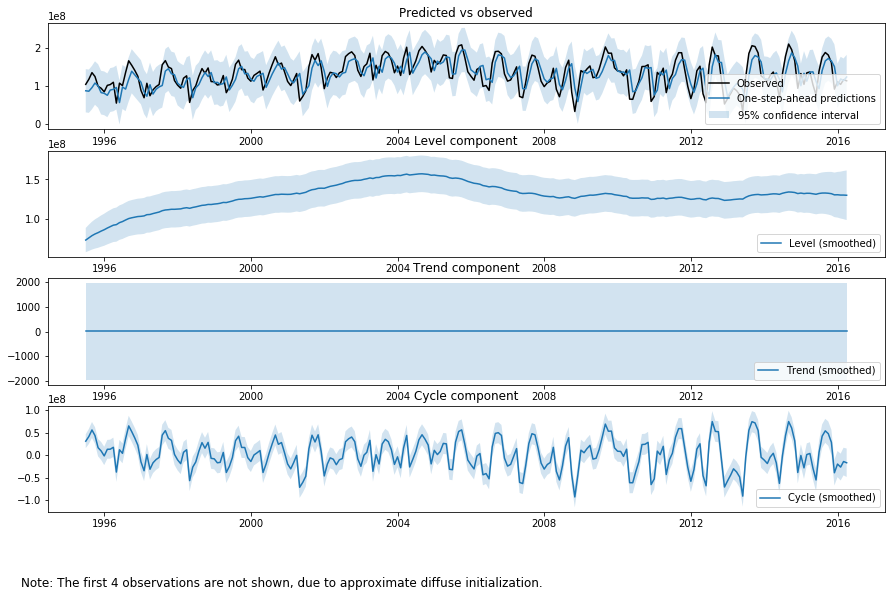

In [39]:
from pandas_datareader import DataReader  
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
import pandas as pd
unrestricted_model = {
    'level': 'local linear trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}

output_mod = sm.tsa.UnobservedComponents(ts_azucar, **unrestricted_model)  
output_res = output_mod.fit(method='powell', disp=False) 
print(output_res.summary()) 

##Gráfico
fig = output_res.plot_components(legend_loc='lower right', figsize=(15, 9));  
output_res.forecast(12) 
log_gnp_forecast=output_res.get_prediction(start='2016-03-31', end='2017-03-31') 

No obstante se presentan los pronósticos en escala transformada:

,lower y,upper y
2016-03-31,1.032104e+08,1.430520e+08
2016-04-30,1.005231e+08,1.403647e+08
2016-05-31,1.007027e+08,1.503035e+08
2016-06-30,1.017624e+08,1.554262e+08
2016-07-31,1.025246e+08,1.579097e+08
2016-08-31,1.028003e+08,1.589490e+08
2016-09-30,1.027055e+08,1.592456e+08
2016-10-31,1.024104e+08,1.592067e+08
2016-11-30,1.020468e+08,1.590604e+08
2016-12-31,1.016915e+08,1.589245e+08


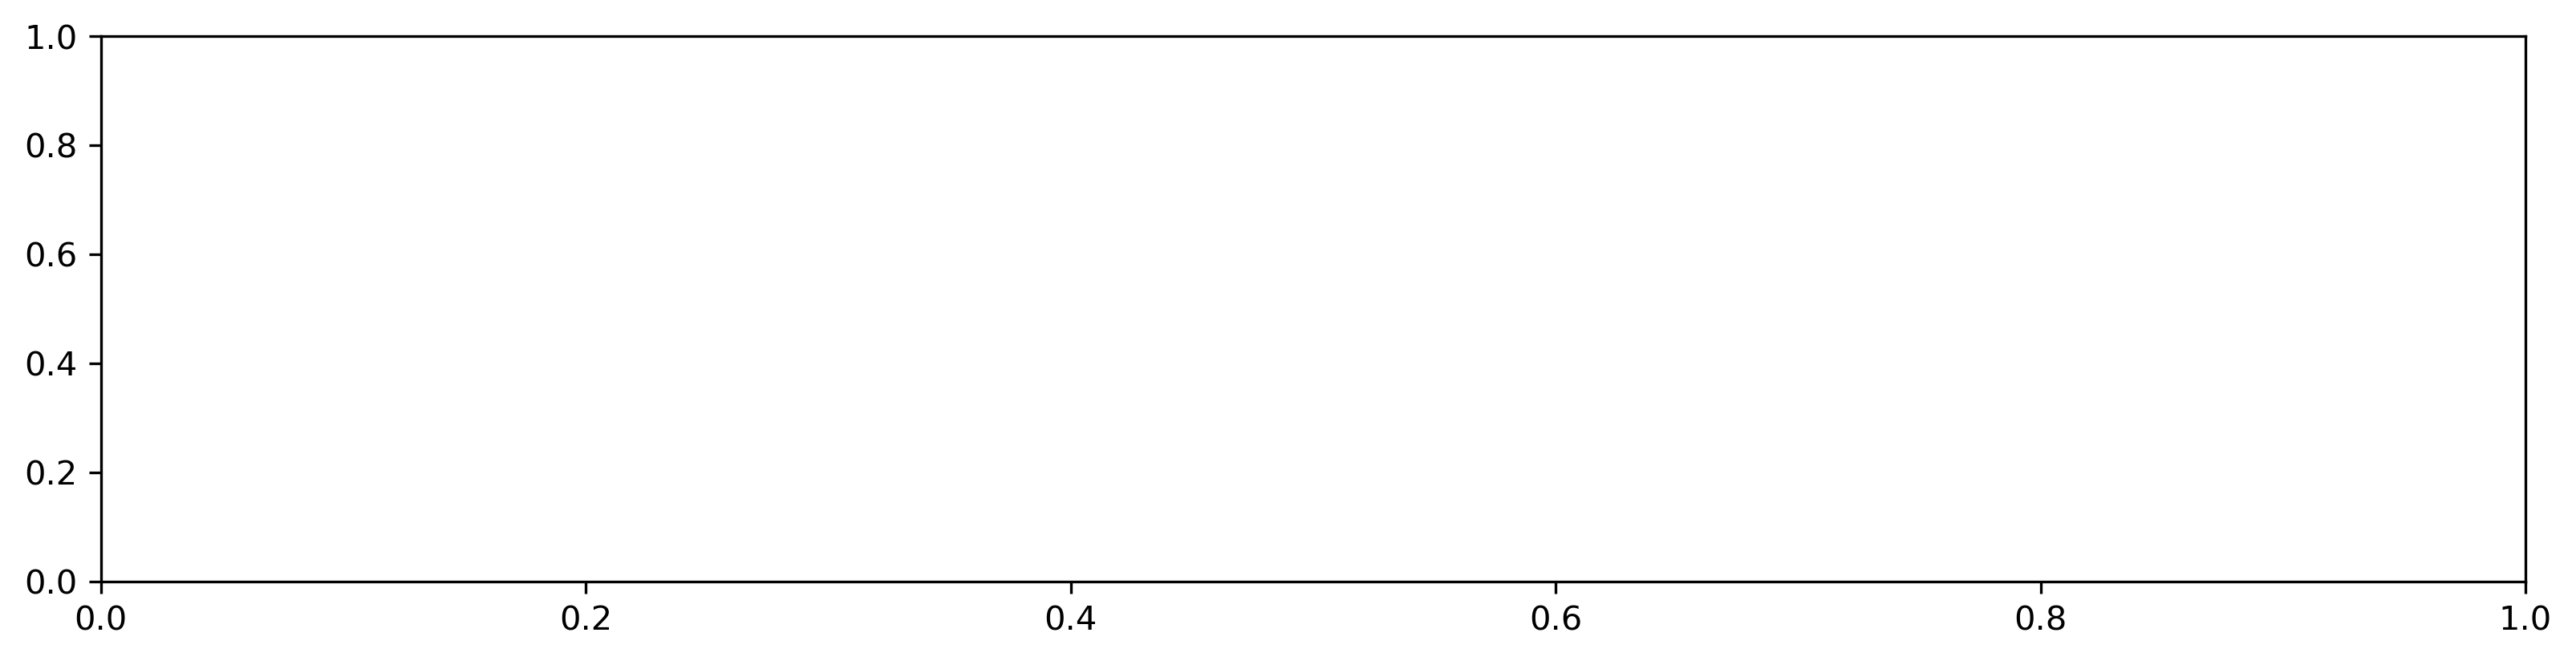

In [31]:
fig, ax = plt.subplots(figsize=(13, 3), dpi=300)
forecast = log_gnp_forecast.predicted_mean
forecast      #pronosticos para los sig 4 periodos (1 año) !!estan EN ESCALA LOGARITMICA!
ci = log_gnp_forecast.conf_int(alpha=0.5)
ci

In [32]:
arraypronosticosSTIC={'pronostico':forecast.values,'li':ci['lower y'].values,'ls':ci['upper y'].values}  #el valor del pronostico en la escala original que son
indice=pd.date_range(start='2016-03-31', end='2017-03-31',freq='M')
pronosticosSTIC=pd.DataFrame(data=arraypronosticosSTIC,index=indice)   #PRONOSTICOS E INTERVALOS DE CONFIANZA
 
#####Función inversa Box-Cox######
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)


####Se devuelve  a la escala original
for column in ['pronostico', 'li', 'ls']:
    pronosticosSTIC[column] = inverse_boxcox(pronosticosSTIC[column],1.571)

Hay que considerar que los pronosticos se encuentran en la escala transformada, luego hay que realizarse una transformación Box-Cox inversa para generar análisis desde la escala original. Por consiguiente se muestran los pronosticos respectivos.

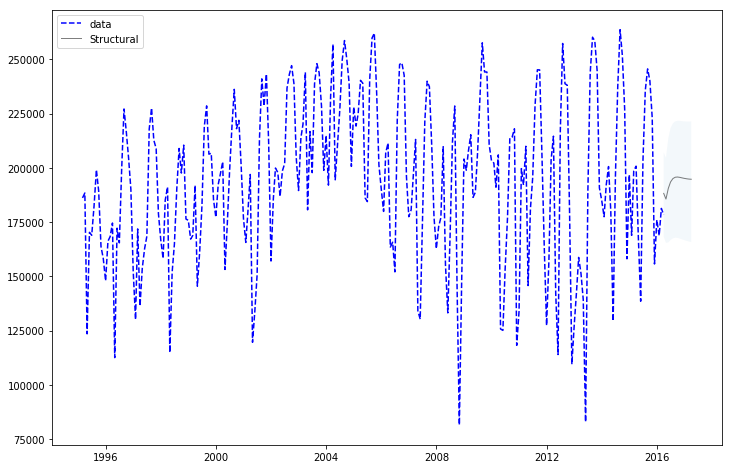

In [33]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Actual data
serie_azucar=pd.DataFrame(serie_azucar) #convirtiendo a dataframe de pandas
ax.plot(serie_azucar.astype('float64'), '--', color="blue", label='data')   #colocando etiquetas
# Means
ax.plot(pronosticosSTIC['pronostico'], lw=1, color="black", alpha=0.5, label='Structural') #colocando etiquetas
ax.fill_between(pronosticosSTIC['pronostico'].index, pronosticosSTIC.iloc[:, 1], pronosticosSTIC.iloc[:, 2], alpha=0.05)
ax.legend(loc='upper left')
plt.draw()


## Validación de supuestos modelo estructural

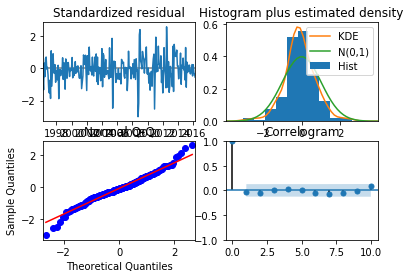

In [38]:

residuales=output_res.resid   
results.plot_diagnostics()
plt.show()


In [34]:
X = ts_azucar.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	output_mod = smapi.tsa.statespace.SARIMAX(history, order=(1,1,1),seasonal_order=(1,1,1,12))
	modelo_fit = output_mod.fit(trend='t')
	output = modelo_fit.forecast(1)  ####Especificar los pasos adelante
	yhat = output[0]
	predicciones.append(inverse_boxcox(yhat,1.57))
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (inverse_boxcox(yhat,1.57), inverse_boxcox(obs,1.57)))

Predicción=160919.390681, Esperado=158636.732370
Predicción=172652.511066, Esperado=205229.166895
Predicción=216266.450102, Esperado=216198.947172
Predicción=159068.145835, Esperado=143213.569610
Predicción=155487.548810, Esperado=114734.543888
Predicción=147750.507807, Esperado=218813.924809
Predicción=239509.102773, Esperado=259300.093878
Predicción=266508.949354, Esperado=240588.346537
Predicción=230828.510182, Esperado=239913.893646
Predicción=218679.628580, Esperado=179947.306885
Predicción=149923.811869, Esperado=110206.102694
Predicción=122801.571928, Esperado=128241.928967
Predicción=156778.895735, Esperado=144093.397199
Predicción=170717.565085, Esperado=159861.315021
Predicción=183585.224005, Esperado=152394.982964
Predicción=93027.607266, Esperado=140194.164683
Predicción=134734.829037, Esperado=83401.835306
Predicción=147020.446564, Esperado=190252.929027
Predicción=222351.682277, Esperado=245563.607746
Predicción=243807.531303, Esperado=262227.916508
Predicción=243951.9617

In [ ]:
errorSarima2 = mean_squared_error(inverse_boxcox(test,1.57), predicciones)
print('ECM_Sarima2: %.3f' % errorSarima2)


## Referencias

BANREP. _Producción de algunos bienes de la industria (Mensual desde 1995)_, disponible en http://www.banrep.gov.co/es/produccion